<a href="https://colab.research.google.com/github/shriom-19/text_to_image/blob/main/text_to_image_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gradio diffusers transformers accelerate torch --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.2 MB/s eta 0:00:00


In [3]:

# Step 2: Code
import torch
from diffusers import DiffusionPipeline
import os

# Use GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

print(f"Using device: {device.upper()}")

# Load Stable Diffusion XL Turbo
model_id = "stabilityai/sdxl-turbo"
pipe = DiffusionPipeline.from_pretrained(model_id, torch_dtype=torch_dtype)
pipe = pipe.to(device)



Using device: CUDA


Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

text_encoder_2/model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
import random
import numpy as np

MAX_SEED = np.iinfo(np.int32).max

def generate_image(prompt, negative_prompt=None, width=512, height=512, guidance_scale=1.0, steps=4, seed=None):
    if seed is None:
        seed = random.randint(0, MAX_SEED)

    generator = torch.manual_seed(seed)

    image = pipe(
        prompt=prompt,
        negative_prompt=negative_prompt,
        width=width,
        height=height,
        guidance_scale=guidance_scale,
        num_inference_steps=steps,
        generator=generator
    ).images[0]

    return image, seed


Prompt here

In [11]:
string=input("Enter the Prompt herer:")

Enter the Prompt herer:a house with wheels


  0%|          | 0/4 [00:00<?, ?it/s]

Generated with seed: 1278521203


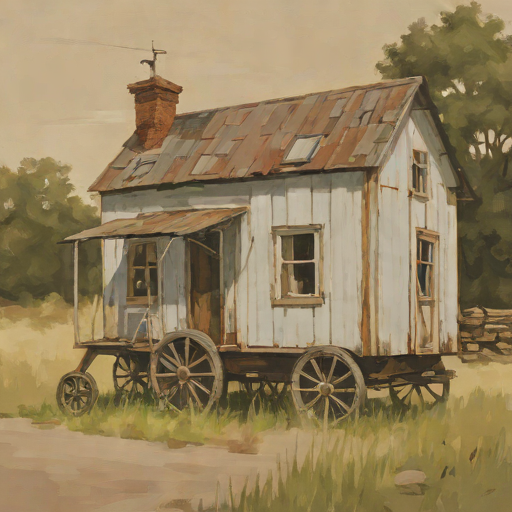

In [16]:
prompt = string
negative_prompt = None  # or "low quality, blurry"
image, used_seed = generate_image(prompt, negative_prompt, width=512, height=512, guidance_scale=1.0, steps=4)

print(f"Generated with seed: {used_seed}")
display(image)


In [15]:
import gradio as gr

def gradio_generate(prompt, negative_prompt, width, height, guidance_scale, steps, seed):
    if seed == 0:
        seed = None  # Allow random seed
    image, used_seed = generate_image(
        prompt=prompt,
        negative_prompt=negative_prompt,
        width=width,
        height=height,
        guidance_scale=guidance_scale,
        steps=steps,
        seed=seed
    )
    return image, f"Seed: {used_seed}"

with gr.Blocks() as demo:
    gr.Markdown("## 🎨 Text-to-Image Generator (SDXL Turbo)")

    prompt = gr.Textbox(label="Prompt", placeholder="Describe your image", lines=1)
    negative_prompt = gr.Textbox(label="Negative Prompt", placeholder='blur images,dull imges, diffusd images', value="", lines=1)

    with gr.Row():
        width = gr.Slider(256, 1024, value=512, step=32, label="Width")
        height = gr.Slider(256, 1024, value=512, step=32, label="Height")

    with gr.Row():
        guidance_scale = gr.Slider(0.0, 10.0, value=1.0, step=0.1, label="Guidance Scale")
        steps = gr.Slider(1, 20, value=4, step=1, label="Inference Steps")
        seed = gr.Number(value=0, label="Seed (0 = random)")

    generate_button = gr.Button("Generate Image")

    output_image = gr.Image(label="Generated Image")
    output_seed = gr.Textbox(label="Seed Used")

    generate_button.click(fn=gradio_generate,
                          inputs=[prompt, negative_prompt, width, height, guidance_scale, steps, seed],
                          outputs=[output_image, output_seed])

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7adc09d6da8e3ec109.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
